In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
X[0]

array([0.97171937])

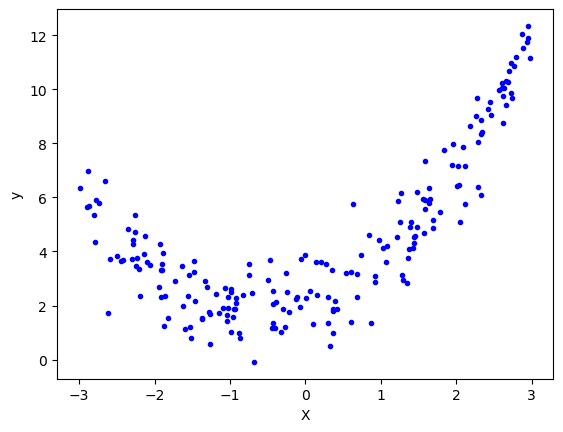

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.275460190441684

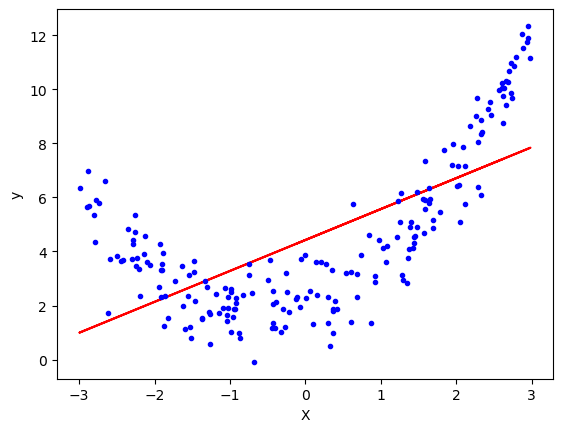

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


**Polynomial regression is nothing but performing the same linear regression but with terms X squared instead of plain X. The terms X Squared, X cubed, X all act as feature columns for the data**

Preparing the Data


In [9]:
degree=2
l=[]
for j in range(len(X)):
    copy=degree
    l_=[]
    for i in range(degree+1):
        l_.append(X[j]**copy)
        copy=copy-1
    l.append(l_)
converted=np.array(l).reshape(200,3)
    
converted

array([[ 9.44238526e-01,  9.71719366e-01,  1.00000000e+00],
       [ 2.28424128e+00, -1.51137066e+00,  1.00000000e+00],
       [ 2.17334705e+00, -1.47422761e+00,  1.00000000e+00],
       [ 3.56835832e+00, -1.88900988e+00,  1.00000000e+00],
       [ 1.88577997e-01, -4.34255681e-01,  1.00000000e+00],
       [ 1.88584327e+00, -1.37326009e+00,  1.00000000e+00],
       [ 5.39053155e+00,  2.32175183e+00,  1.00000000e+00],
       [ 4.39729564e-02,  2.09697297e-01,  1.00000000e+00],
       [ 4.12669973e+00,  2.03142800e+00,  1.00000000e+00],
       [ 4.97251447e+00, -2.22991356e+00,  1.00000000e+00],
       [ 3.67309116e-01,  6.06060324e-01,  1.00000000e+00],
       [ 6.23314570e+00, -2.49662686e+00,  1.00000000e+00],
       [ 1.91636554e+00,  1.38432855e+00,  1.00000000e+00],
       [ 4.63222032e-01, -6.80604167e-01,  1.00000000e+00],
       [ 1.37214520e-01,  3.70424783e-01,  1.00000000e+00],
       [ 5.07122175e+00, -2.25193733e+00,  1.00000000e+00],
       [ 1.59203162e+00,  1.26175735e+00

In [10]:
lr2=LinearRegression()

In [11]:
lr2.fit(converted,y)

LinearRegression()

In [12]:
lr2.coef_


array([[0.76355449, 0.94871174, 0.        ]])

In [13]:
lr2.intercept_

array([2.07933007])

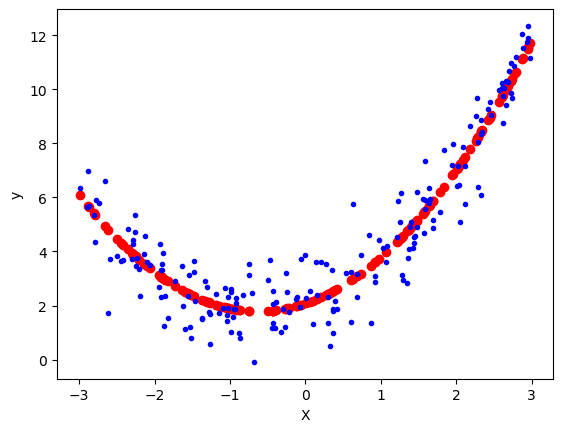

In [14]:
plt.scatter(X_train,(X_train**2)*lr2.coef_[0][0]+X_train*lr2.coef_[0][1]+lr2.intercept_,color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [15]:
import statsmodels.api as sm

In [16]:
model = sm.OLS(y, converted).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     884.5
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.85e-99
Time:                        18:47:34   Log-Likelihood:                -268.14
No. Observations:                 200   AIC:                             542.3
Df Residuals:                     197   BIC:                             552.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7636      0.025     30.265      0.0